## Impoting all the required libraries

In [2]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
from shutil import copyfile


In [3]:
# Importing MobileNetV2 from keras applications
from keras.applications import mobilenet_v2

## Preparing directories for dataset

In [ ]:
main_dir = '/content/drive/MyDrive/Datastore'

# Make all the required sub-directories for ImageDataGenerator class
try:
    #YOUR CODE GOES HERE
    base_dir = main_dir
    train_dir = os.path.join(base_dir,'training')
    testing_dir = os.path.join(base_dir,'testing')
    train_acne_dir = os.path.join(train_dir,'acne')
    testing_acne_dir = os.path.join(testing_dir,'acne')
    train_pox_dir = os.path.join(train_dir,'chickenpox')
    testing_pox_dir = os.path.join(testing_dir,'chickenpox')
    train_ecz_dir = os.path.join(train_dir,'eczema')
    testing_ecz_dir = os.path.join(testing_dir,'eczema')
    train_meas_dir = os.path.join(train_dir,'measles')
    testing_meas_dir = os.path.join(testing_dir,'measles')
    train_psor_dir = os.path.join(train_dir,'psoriasis')
    testing_psor_dir = os.path.join(testing_dir,'psoriasis')
    train_ringw_dir = os.path.join(train_dir,'ringworm')
    testing_ringw_dir = os.path.join(testing_dir,'ringworm')
    train_scab_dir = os.path.join(train_dir,'scabies')
    testing_scab_dir = os.path.join(testing_dir,'scabies')
    os.mkdir(train_dir)
    os.mkdir(testing_dir)
    os.mkdir(train_acne_dir)
    os.mkdir(testing_acne_dir)
    os.mkdir(train_pox_dir)
    os.mkdir(testing_pox_dir)
    os.mkdir(train_ecz_dir)
    os.mkdir(testing_ecz_dir)
    os.mkdir(train_meas_dir)
    os.mkdir(testing_meas_dir)
    os.mkdir(train_psor_dir)
    os.mkdir(testing_psor_dir)
    os.mkdir(train_ringw_dir)
    os.mkdir(testing_ringw_dir)
    os.mkdir(train_scab_dir)
    os.mkdir(testing_scab_dir)
    
    
    
except OSError:
    pass

## Data random sampling and splitting into training and validation data

In [ ]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    list_of_dir = os.listdir(SOURCE)
    randomized_list = random.sample(list_of_dir,len(list_of_dir))
    new_list = []
    for file in randomized_list:
        if os.path.getsize(SOURCE + file) != 0:
            new_list.append(file)
    for i in range(len(new_list)):
        if i <= SPLIT_SIZE*len(new_list)-1:
            copyfile(os.path.join(SOURCE,new_list[i]),os.path.join(TRAINING,new_list[i]))
        else:
            copyfile(os.path.join(SOURCE,new_list[i]),os.path.join(TESTING,new_list[i])) 


ACNE_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Acne/" # Source directory from which the data will be copied
TRAINING_ACNE_DIR = "/content/drive/MyDrive/Datastore/training/acne/" # Subdirectories that will be the destination of the copied data 
TESTING_ACNE_DIR = "/content/drive/MyDrive/Datastore/testing/acne/"

POX_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Chicken_pox/"
TRAINING_POX_DIR = "/content/drive/MyDrive/Datastore/training/chickenpox/"
TESTING_POX_DIR = "/content/drive/MyDrive/Datastore/testing/chickenpox/"

ECZ_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Eczema/"
TRAINING_ECZ_DIR = "/content/drive/MyDrive/Datastore/training/eczema/"
TESTING_ECZ_DIR = "/content/drive/MyDrive/Datastore/testing/eczema/"

MEA_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Measles/"
TRAINING_MEA_DIR = "/content/drive/MyDrive/Datastore/training/measles/"
TESTING_MEA_DIR = "/content/drive/MyDrive/Datastore/testing/measles/"

PSOR_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Psoriasis/"
TRAINING_PSOR_DIR = "/content/drive/MyDrive/Datastore/training/psoriasis/"
TESTING_PSOR_DIR = "/content/drive/MyDrive/Datastore/testing/psoriasis/"

RING_SOURCE_DIR = "/content/drive/MyDrive/Data-1/ringworm/"
TRAINING_RING_DIR = "/content/drive/MyDrive/Datastore/training/ringworm/"
TESTING_RING_DIR = "/content/drive/MyDrive/Datastore/testing/ringworm/"

SCAB_SOURCE_DIR = "/content/drive/MyDrive/Data-1/Scabies/"
TRAINING_SCAB_DIR = "/content/drive/MyDrive/Datastore/training/scabies/"
TESTING_SCAB_DIR = "/content/drive/MyDrive/Datastore/testing/scabies/"



split_size = .7
split_data(ACNE_SOURCE_DIR, TRAINING_ACNE_DIR, TESTING_ACNE_DIR, split_size)
split_data(POX_SOURCE_DIR, TRAINING_POX_DIR, TESTING_POX_DIR, split_size)
split_data(ECZ_SOURCE_DIR, TRAINING_ECZ_DIR, TESTING_ECZ_DIR, split_size)
split_data(MEA_SOURCE_DIR, TRAINING_MEA_DIR, TESTING_MEA_DIR, split_size)
split_data(PSOR_SOURCE_DIR, TRAINING_PSOR_DIR, TESTING_PSOR_DIR, split_size)
split_data(RING_SOURCE_DIR, TRAINING_RING_DIR, TESTING_RING_DIR, split_size)
split_data(SCAB_SOURCE_DIR, TRAINING_SCAB_DIR, TESTING_SCAB_DIR, split_size)

## To clean training & testing/validation directories

In [ ]:
# To clean directory/training file
for files1 in os.listdir('/content/drive/MyDrive/Datastore/training'):
  for files2 in os.listdir('/content/drive/MyDrive/Datastore/training' + '/' + files1):
    os.remove('/content/drive/MyDrive/Datastore/training' + '/' + files1 + '/' + files2)


for files3 in os.listdir('/content/drive/MyDrive/Datastore/testing'):
  for files4 in os.listdir('/content/drive/MyDrive/Datastore/testing' + '/' + files3):
    os.remove('/content/drive/MyDrive/Datastore/testing' + '/' + files3 + '/' + files4)

## Callbacks for training process

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [5]:
callbacks = myCallback()

## Image data augmentation and pre-processing using Keras ImageDataGenerator and MobileNetV2 preprocessing function

In [9]:
TRAINING_DIR = '/content/drive/MyDrive/Datastore/training'#YOUR CODE HERE
train_datagen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')#YOUR CODE HERE rescale=1.0/255.0 

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=32, class_mode='categorical', target_size=(224,224))#YOUR CODE HERE

VALIDATION_DIR = '/content/drive/MyDrive/Datastore/testing'#YOUR CODE HERE
validation_datagen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)#YOUR CODE HERE rescale=1.0/255.0

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=32, class_mode='categorical', target_size=(224,224))#YOUR CODE HERE

Found 1157 images belonging to 7 classes.
Found 501 images belonging to 7 classes.


In [ ]:
print(train_generator)

In [6]:
TEST_DIR = '/content/drive/MyDrive/Datastore/test_sample'#YOUR CODE HERE
test_datagen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)#YOUR CODE HERE rescale=1.0/255.0

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
test_generator = test_datagen.flow_from_directory(TEST_DIR, batch_size=1, class_mode='categorical', target_size=(224,224))

Found 37 images belonging to 7 classes.


## Self-Trained Sequential Model for initial trial purposes


In [ ]:
model = tf.keras.models.Sequential([
# YOUR CODE HERE sblmnya 150,150,3
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7,activation='softmax')
])
model.summary()
#model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# RMSprop(lr=0.001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        1

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
37/37 [==============================] - 28s 743ms/step - loss: 1.9049 - acc: 0.2290 - val_loss: 1.8933 - val_acc: 0.2455
Epoch 2/25
37/37 [==============================] - 27s 730ms/step - loss: 1.8939 - acc: 0.2429 - val_loss: 1.8764 - val_acc: 0.2455
Epoch 3/25
37/37 [==============================] - 27s 729ms/step - loss: 1.8860 - acc: 0.2446 - val_loss: 1.8706 - val_acc: 0.2455
Epoch 4/25
37/37 [==============================] - 27s 727ms/step - loss: 1.8800 - acc: 0.2446 - val_loss: 1.8595 - val_acc: 0.2455
Epoch 5/25
37/37 [==============================] - 26s 718ms/step - loss: 1.8790 - acc: 0.2420 - val_loss: 1.8658 - val_acc: 0.2455
Epoch 6/25
37/37 [==============================] - 26s 713ms/step - loss: 1.8682 - acc: 0.2498 - val_loss: 1.8526 - val_acc: 0.2595
Epoch 7/25
37/37 [==============================] - 26s 719ms/step - loss: 1.8624 - acc: 0.2619 - val_loss: 1.8474 - val_acc: 0.2515
Epoch 8/25
37/37 [==============================] - 26s 711ms/step - 

# Transfer Learning Pre-Trained Model

## Mobilenet

### Downloading the MobileNetV2 model

In [ ]:
basemodel = mobilenet_v2.MobileNetV2(include_top=True,weights='imagenet',input_shape=(224,224,3))

In [ ]:
basemodel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Adding newly trained classification layers to the output of MobileNetV2

In [ ]:
input = basemodel.input

#new_class_layer = Dense(7,activation='softmax')
layer_add1 = Dense(128,activation='relu')(basemodel.layers[-2].output)
layer_add1 = Dropout(0.2)(layer_add1)
layer_add1 = Dense(64,activation='relu')(layer_add1)
layer_add1 = Dropout(0.2)(layer_add1)
new_class_layer = Dense(7,activation='softmax')(layer_add1)


trans_mobilenet = Model(input,new_class_layer)

In [ ]:
trans_mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

### Freezing all the layers from MobileNetV2 for feature extraction and adjusting the newly added classification layers to be trainable

In [ ]:
for count,layer in enumerate(trans_mobilenet.layers[:-5]):
  layer.trainable = False

for count,layer in enumerate(trans_mobilenet.layers[-5:]):
  layer.trainable = True

In [ ]:
trans_mobilenet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
trans_mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

### Training/fitting the model

In [ ]:
history_mobilenet = trans_mobilenet.fit_generator(train_generator,
                                                  steps_per_epoch=37,
                                                  epochs=50,
                                                  verbose=1,
                                                  validation_data=validation_generator,
                                                  validation_steps=16,
                                                  callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
37/37 [==============================] - 65s 1s/step - loss: 1.9594 - acc: 0.2452 - val_loss: 1.4768 - val_acc: 0.4750
Epoch 2/50
37/37 [==============================] - 28s 764ms/step - loss: 1.5424 - acc: 0.4296 - val_loss: 1.3770 - val_acc: 0.5030
Epoch 3/50
37/37 [==============================] - 28s 776ms/step - loss: 1.3787 - acc: 0.4898 - val_loss: 1.2728 - val_acc: 0.5529
Epoch 4/50
37/37 [==============================] - 27s 739ms/step - loss: 1.2796 - acc: 0.5290 - val_loss: 1.1488 - val_acc: 0.5988
Epoch 5/50
37/37 [==============================] - 28s 771ms/step - loss: 1.1626 - acc: 0.5859 - val_loss: 1.1959 - val_acc: 0.5589
Epoch 6/50
37/37 [==============================] - 28s 765ms/step - loss: 1.0886 - acc: 0.6140 - val_loss: 1.2309 - val_acc: 0.5569
Epoch 7/50
37/37 [==============================] - 27s 762ms/step - loss: 1.0954 - acc: 0.6229 - val_loss: 1.1020 - val_acc: 0.6108
Epoch 8/50
37/37 [==============================] - 28s 771ms/step - los

### Visualizing the loss and accuracy

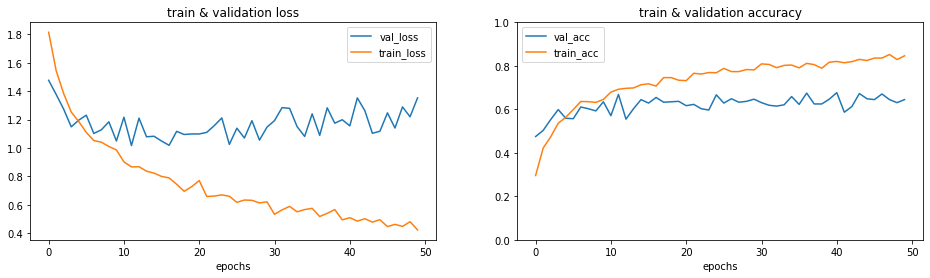

In [ ]:
# Training progress visualization
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_mobilenet.history["val_loss"],label='val_loss')
ax.plot(history_mobilenet.history["loss"],label='train_loss')
ax.set_title("train & validation loss")
ax.set_xlabel("epochs")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history_mobilenet.history["val_acc"],label='val_acc')
ax2.plot(history_mobilenet.history["acc"],label='train_acc')
ax2.set_title("train & validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)
ax2.legend()

plt.show()

### Model evaluation on validation set

In [ ]:
loss, accuracy = trans_mobilenet.evaluate(validation_generator,batch_size=32,steps=16)
print('Loss on test data:',loss)
print('Loss on test accuracy:',accuracy)

16/16 [==============================] - 6s 387ms/step - loss: 1.5085 - acc: 0.6108
Loss on test data: 1.5085028409957886
Loss on test accuracy: 0.6107784509658813


### Model predict test

In [ ]:
TEST_PATH1 = '/content/drive/MyDrive/Datastore/test_sample/kurap_5.jpeg'
TEST_PATH2 = '/content/drive/MyDrive/Datastore/test_sample/eczema33.jpg'
TEST_PATH3 = '/content/drive/MyDrive/Datastore/test_sample/eczema13.jpg'
TEST_PATH4 = '/content/drive/MyDrive/Datastore/test_sample/acne-infantile-6-1.jpg'
TEST_PATH5 = '/content/drive/MyDrive/Datastore/test_sample/chickenpox69-2.jpg'
TEST_PATH6 = '/content/drive/MyDrive/Datastore/test_sample/images (34)1.jpg'
TEST_PATH7 = '/content/drive/MyDrive/Datastore/test_sample/scabies21.jpg'
TEST_PATH8 = '/content/drive/MyDrive/Datastore/test_sample/scabies35.jpg'
TEST_PATH9 = '/content/drive/MyDrive/Datastore/test_sample/measles (13).jpg'
TEST_PATH10 = '/content/drive/MyDrive/Datastore/test_sample/measles (2)-1.png'

#Real test set -> gambar random dari internet
TEST_PATH11 = '/content/drive/MyDrive/Datastore/test_sample/280x190_mrtest_measles_other.jpg'
TEST_PATH12 = '/content/drive/MyDrive/Datastore/test_sample/40492002_303.jpg' #measles
TEST_PATH13 = '/content/drive/MyDrive/Datastore/test_sample/eczema.jpg'
TEST_PATH14 = '/content/drive/MyDrive/Datastore/test_sample/eczema2.jpg'
TEST_PATH15 = '/content/drive/MyDrive/Datastore/test_sample/eczema3.jpg'
TEST_PATH16 = '/content/drive/MyDrive/Datastore/test_sample/650x350_ringworm_slideshow.jpg'
TEST_PATH17 = '/content/drive/MyDrive/Datastore/test_sample/ringworm-200x164.jpg'
TEST_PATH18 = '/content/drive/MyDrive/Datastore/test_sample/ringwormm.jpg'
TEST_PATH19 = '/content/drive/MyDrive/Datastore/test_sample/15436_lores.width-750ringwormm.jpg'
TEST_PATH20 = '/content/drive/MyDrive/Datastore/test_sample/642x361_Chickenpoxtest.jpg'
TEST_PATH21 = '/content/drive/MyDrive/Datastore/test_sample/plaque-psoriasis.jpg'
TEST_PATH22 = '/content/drive/MyDrive/Datastore/test_sample/psoriasis2.jpg'
TEST_PATH23 = '/content/drive/MyDrive/Datastore/test_sample/gatal_scabies.jpg'
TEST_PATH24 = '/content/drive/MyDrive/Datastore/test_sample/scabiestest2.jpg'
TEST_PATH25 = '/content/drive/MyDrive/Datastore/test_sample/scabies19-ccef4aaea4de42e8a97c60b63b9681a5.jpg'
TEST_PATH26 = '/content/drive/MyDrive/Datastore/test_sample/normalskin60.jpg' #Normal skin masih sangat ngaco
TEST_PATH27 = '/content/drive/MyDrive/Datastore/test_sample/normalskin26.jpg' 


img = image.load_img(TEST_PATH20, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet_v2.preprocess_input(x)
#print(x)
result = trans_mobilenet.predict(x)
max_prob = 0
print(result)
for count,element in enumerate(list(result[0])):
  if element > max_prob:
    max_prob = element
    index = count
  

print("Probability:",max_prob)
if index == 0:
  print("Class: Acne")
elif index == 1:
  print("Class: Chicken Pox/Varicella")
elif index == 2:
  print("Class: Eczema")
elif index == 3:
  print("Class: Measles")
elif index == 4:
  print("Class: Psoriasis")
elif index == 5:
  print("Class: Ringworm")
elif index == 6:
  print("Class: Scabies")


  

#print(type(list(result[0])))

[[2.8327509e-04 9.9971205e-01 1.1872233e-06 1.2119082e-07 2.6648129e-06
  4.6089871e-10 6.5581651e-07]]
Probability: 0.99971205
Class: Chicken Pox/Varicella


### Saving model

In [ ]:
trans_mobilenet.save('/content/drive/MyDrive/Model5MobileNetV2')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model5MobileNetV2/assets


### Loading model

In [11]:
loaded_model = tf.keras.models.load_model(
  '/content/drive/MyDrive/Model5MobileNetV2'
)

### Confusion matrix plot

In [7]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    by: https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example
    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")

    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
classes_names = []

for key in train_generator.class_indices:
    classes_names.append(key)

print(classes_names)

['acne', 'chickenpox', 'eczema', 'measles', 'psoriasis', 'ringworm', 'scabies']


Confusion Matrix
Normalized confusion matrix


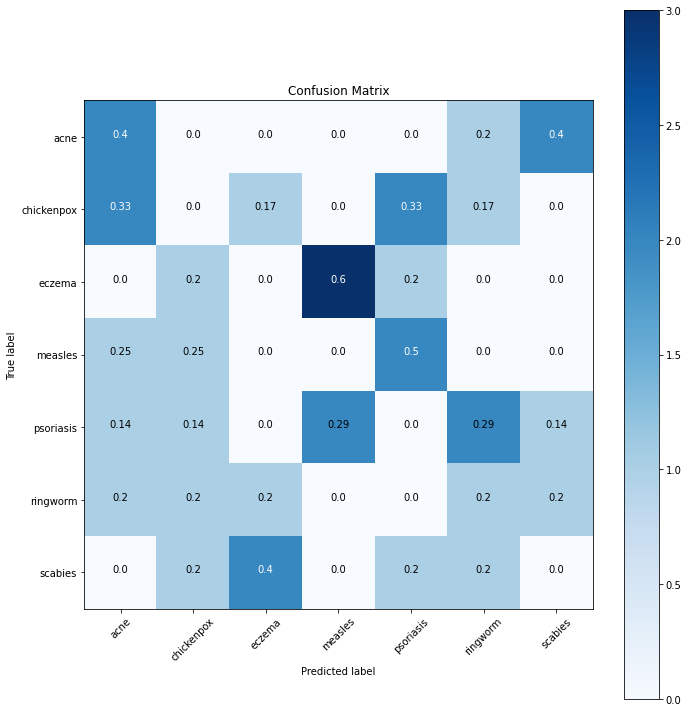

In [17]:
prediction_res = loaded_model.predict(test_generator)

prediction = np.argmax(prediction_res, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, prediction)

plot_confusion_matrix(cm, classes_names,title='Confusion Matrix')

### Loaded model predict test

In [33]:
#From validation set
TEST_PATH1 = '/content/drive/MyDrive/Datastore/test_sample/kurap_5.jpeg'
TEST_PATH2 = '/content/drive/MyDrive/Datastore/test_sample/eczema33.jpg'
TEST_PATH3 = '/content/drive/MyDrive/Datastore/test_sample/eczema13.jpg'
TEST_PATH4 = '/content/drive/MyDrive/Datastore/test_sample/acne-infantile-6-1.jpg'
TEST_PATH5 = '/content/drive/MyDrive/Datastore/test_sample/chickenpox69-2.jpg'
TEST_PATH6 = '/content/drive/MyDrive/Datastore/test_sample/images (34)1.jpg'
TEST_PATH7 = '/content/drive/MyDrive/Datastore/test_sample/scabies21.jpg'
TEST_PATH8 = '/content/drive/MyDrive/Datastore/test_sample/scabies35.jpg'
TEST_PATH9 = '/content/drive/MyDrive/Datastore/test_sample/measles (13).jpg'
TEST_PATH10 = '/content/drive/MyDrive/Datastore/test_sample/measles (2)-1.png'

#Real test set -> from google search images
TEST_PATH11 = '/content/drive/MyDrive/Datastore/test_sample/280x190_mrtest_measles_other.jpg'
TEST_PATH12 = '/content/drive/MyDrive/Datastore/test_sample/40492002_303.jpg' #measles
TEST_PATH13 = '/content/drive/MyDrive/Datastore/test_sample/eczema.jpg'
TEST_PATH14 = '/content/drive/MyDrive/Datastore/test_sample/eczema2.jpg'
TEST_PATH15 = '/content/drive/MyDrive/Datastore/test_sample/eczema3.jpg'
TEST_PATH16 = '/content/drive/MyDrive/Datastore/test_sample/650x350_ringworm_slideshow.jpg'
TEST_PATH17 = '/content/drive/MyDrive/Datastore/test_sample/ringworm-200x164.jpg'
TEST_PATH18 = '/content/drive/MyDrive/Datastore/test_sample/ringwormm.jpg'
TEST_PATH19 = '/content/drive/MyDrive/Datastore/test_sample/15436_lores.width-750ringwormm.jpg'
TEST_PATH20 = '/content/drive/MyDrive/Datastore/test_sample/642x361_Chickenpoxtest.jpg'
TEST_PATH21 = '/content/drive/MyDrive/Datastore/test_sample/plaque-psoriasis.jpg'
TEST_PATH22 = '/content/drive/MyDrive/Datastore/test_sample/psoriasis2.jpg'
TEST_PATH23 = '/content/drive/MyDrive/Datastore/test_sample/gatal_scabies.jpg'
TEST_PATH24 = '/content/drive/MyDrive/Datastore/test_sample/scabiestest2.jpg'
TEST_PATH25 = '/content/drive/MyDrive/Datastore/test_sample/scabies19-ccef4aaea4de42e8a97c60b63b9681a5.jpg'
TEST_PATH26 = '/content/drive/MyDrive/Datastore/test_sample/normalskin60.jpg' #Normal skin masih sangat ngaco
TEST_PATH27 = '/content/drive/MyDrive/Datastore/test_sample/normalskin26.jpg'


img = image.load_img('/content/drive/MyDrive/Datastore/test_sample/scabies/scabies21.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet_v2.preprocess_input(x)
#print(x)
result = loaded_model.predict(x)
max_prob = 0
print(result)
for count,element in enumerate(list(result[0])):
  if element > max_prob:
    max_prob = element
    index = count
  

print("Probability:",max_prob)
if index == 0:
  print("Class: Acne")
elif index == 1:
  print("Class: Chicken Pox/Varicella")
elif index == 2:
  print("Class: Eczema")
elif index == 3:
  print("Class: Measles")
elif index == 4:
  print("Class: Psoriasis")
elif index == 5:
  print("Class: Ringworm")
elif index == 6:
  print("Class: Scabies")

[[7.1988034e-04 7.2777063e-02 4.8927732e-02 5.0980337e-03 1.0276439e-02
  2.1187454e-03 8.6008203e-01]]
Probability: 0.86008203
Class: Scabies
